### Building footprint (plus street network) figure-ground diagrams
Use OSMnx to download OpenStreetMap building footprints and visualize them as figure-ground diagrams.

In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)

In [2]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 500

### One and a half square kilometers near the Arc de Triomphe

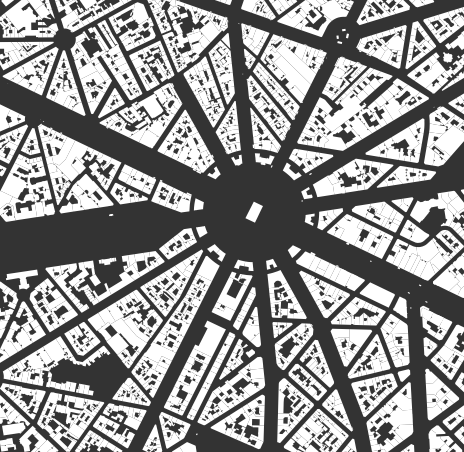

In [6]:
point = (48.873446, 2.294255)
dist = 612
gdf = ox.buildings_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.plot_buildings(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,
                            save=True, show=False, close=True, filename='paris_bldgs', dpi=150)
Image('{}/{}.{}'.format(img_folder, 'paris_bldgs', extension), height=size, width=size)

### Street network + building footprints: square-mile visualizations

In [16]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them
def make_plot(place, point, network_type='drive', bldg_color='orange', dpi=200,
              dist=2000, default_width=2, street_widths=None):
    gdf = ox.buildings_from_point(point=point, distance=dist)
    gdf_proj = ox.project_gdf(gdf)
    fig, ax = ox.plot_figure_ground(point=point, dist=dist, network_type=network_type, default_width=default_width,
                                    street_widths=street_widths, save=False, show=False, close=True)
    fig, ax = ox.plot_buildings(gdf_proj, fig=fig, ax=ax, color=bldg_color, set_bounds=False,
                                save=True, show=False, close=True, filename=place, dpi=dpi)

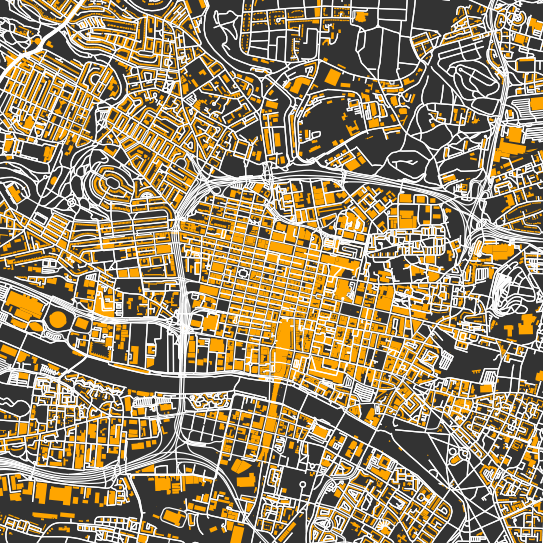

In [14]:
place = 'glasgow_buildings'
point = (55.863671, -4.259721)
make_plot(place, point, network_type='all', default_width=1, street_widths={'secondary':3})
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

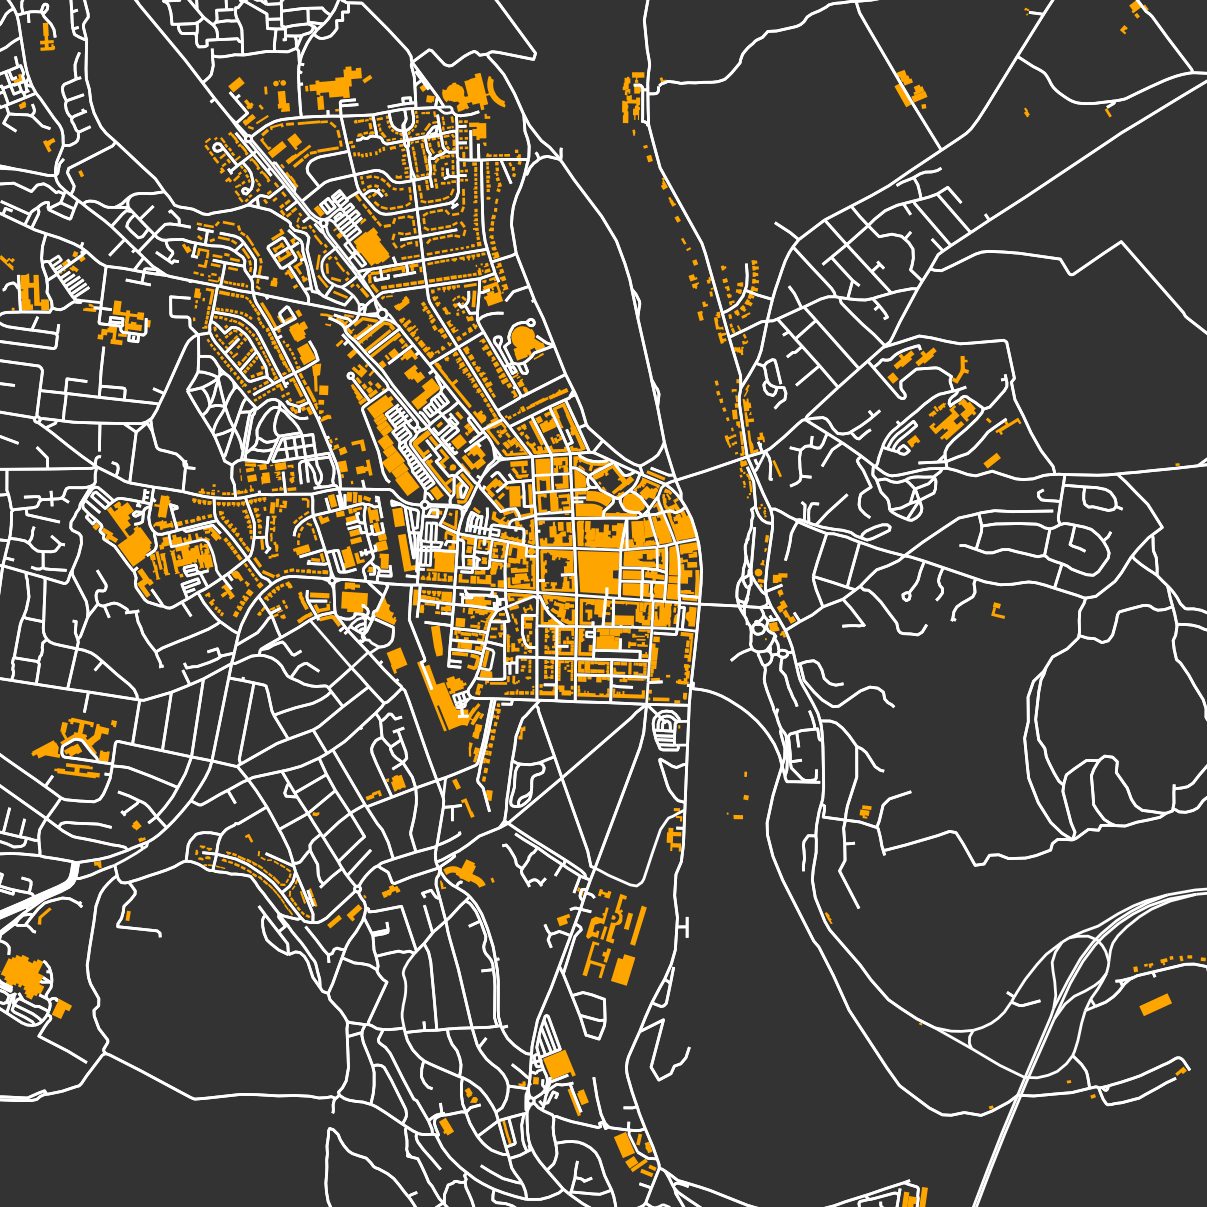

In [17]:
place = 'perth_buildings'
point = (56.3950, -3.4308)
make_plot(place, point, network_type='all', default_width=1, street_widths={'secondary':3})
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

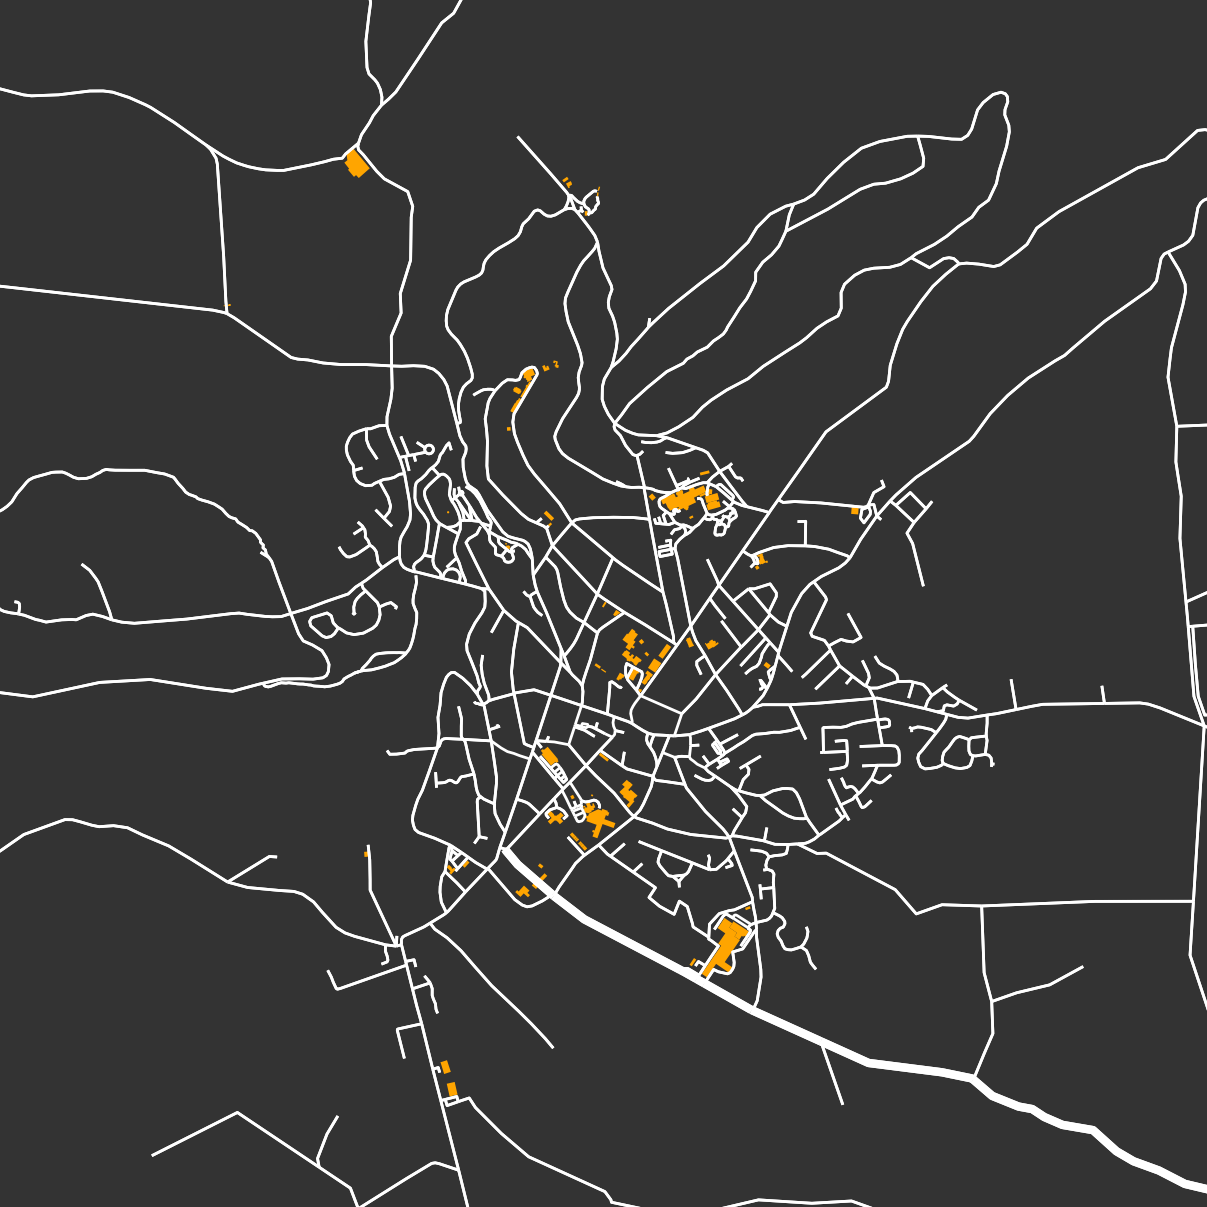

In [19]:
place = 'crieff_buildings'
point = (56.3766, -3.8420)
make_plot(place, point, network_type='all', default_width=1, street_widths={'secondary':3})
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)